In [5]:
import torch
import intel_extension_for_pytorch
from vae import *

enc = torch.load('cifar-e.pth')
dec = torch.load('cifar-d.pth')
enc.eval()
dec.eval()


Decoder(
  (mlp): Sequential(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=3072, bias=True)
    (3): Sigmoid()
  )
)

In [6]:
import matplotlib.pyplot as plt


In [87]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

def my_transform(x):
    return to_tensor(x).flatten().to(device)

training_data = datasets.CIFAR10(
        root='data',
        train=True,
        download=True,
        transform=my_transform
    )

Files already downloaded and verified


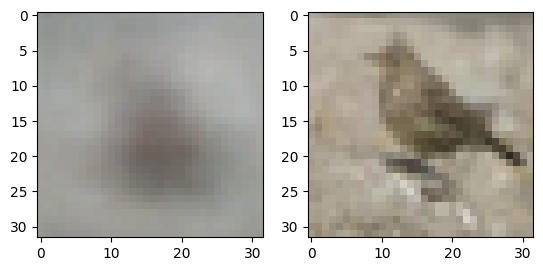

In [103]:
x, _ = training_data[120]
mu, sigma = enc(x).split(256)
z = mu + sigma * torch.randn(256, device='xpu')
y = dec(z.unsqueeze(0))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(y.reshape(3,32,32).permute(1, 2, 0).cpu().detach(), cmap='gray')
ax[1].imshow(x.reshape(3,32,32).permute(1, 2, 0).cpu())